In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('Копия_Данные_для_задания_4_Данные_2.csv')

Последние четыре столбика являются фиктивными переменными, которые были придуманы и выведены из предыдуших изначальных переменных датасета *(преобразовали и вывели новые столбики сразу в Excel)*

In [3]:
df

,Name,Quantity in 1 unit,Type,Seller,"Price for 1 uint, rub","Sales, tons","Sales, th. rub",Weighted distribution,Price for 1 bit,Market Share,Sales in packages,Sales in bits
0,GREENFIELD(OR.TR.) GOLDEN CEYLON,100,ч,п,221,1749,1916233,75,"2,21","4,067729221","8670,737557","867073,7557"
1,PRINCESSA NOORI VYSOKOGORNIY,100,ч,п,138,2089,1424092,64,"1,38","3,023025197","10319,50725","1031950,725"
2,PRINCESSA NOORI VYSOKOGORNIY,25,ч,п,42,1681,1416400,93,"1,68","3,006696821","33723,80952","843095,2381"
3,LIPTON(UNILEVER) YELLOW LABEL,100,ч,п,160,1747,1388139,72,"1,6","2,94670511","8675,86875","867586,875"
4,GREENFIELD(OR.TR.) GOLDEN CEYLON,25,ч,п,80,756,1200753,88,"3,2","2,548927017","15009,4125","375235,3125"
...,...,...,...,...,...,...,...,...,...,...,...,...
294,MK SUPREME CTC ASSAM,250,ч,в,99,42,16480,1,"0,396","0,03498331234","166,4646465","41616,16162"
295,BATTLER VELIKIY SLON,250,ч,в,226,13,11966,2,"0,904","0,02540111138","52,94690265","13236,72566"
296,HYLEYS ANGL.KLASS.,100,ч,п,192,6,7132,3,"1,92","0,01513962279","37,14583333","3714,583333"
297,BATTLER DVA VELIKANA,100,ч,в,98,21,20511,3,"0,98","0,04354021356","209,2959184","20929,59184"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   299 non-null    object
 1   Quantity in 1 unit     299 non-null    int64 
 2   Type                   299 non-null    object
 3   Seller                 299 non-null    object
 4   Price for 1 uint, rub  299 non-null    int64 
 5   Sales, tons            299 non-null    int64 
 6   Sales, th. rub         299 non-null    int64 
 7   Weighted distribution  299 non-null    int64 
 8   Price for 1 bit        299 non-null    object
 9   Market Share           299 non-null    object
 10  Sales in packages      299 non-null    object
 11  Sales in bits          299 non-null    object
dtypes: int64(5), object(7)
memory usage: 28.2+ KB


Исходя из наблюдения в числовых различиях между Пятерочкой и Вкусвилл в продажах *(наблюдения были замечены на диаграммах в дашборде)*, решили сравнить кол-во продаж упаковок чая (`Sales in packages`). Из-за запятой во `float` данных Excel получили строковые представления, но, т.к. нас интересует только одна колонка, переведем ее в нужный тип данных

In [5]:
df['Sales in packages'] = df['Sales in packages'].apply(lambda x: float(x.replace(',', '.')))

In [6]:
# две подвыборки
pyaterochka = df[df['Seller'] == 'п']['Sales in packages']
vkus = df[df['Seller'] == 'в']['Sales in packages']

Количество продаж упаковок чая в Пятерочке суммарно больше Вкусвилл почти в 3 раза, но проверим этот факт статистически с помощью сравнения распределений упаковок для двух магазинов и двух независимых подходов анализа

- **H0 (нулевая гипотеза)**: среднее значение распределения продаж в упаковках чая в Пятерочке одинаково со средним значением такого же распределения во Вкусвилл
- **H1 (альтернативная гипотеза)**: среднее значение двух распределений магазинов продаж в упаковках чая различны

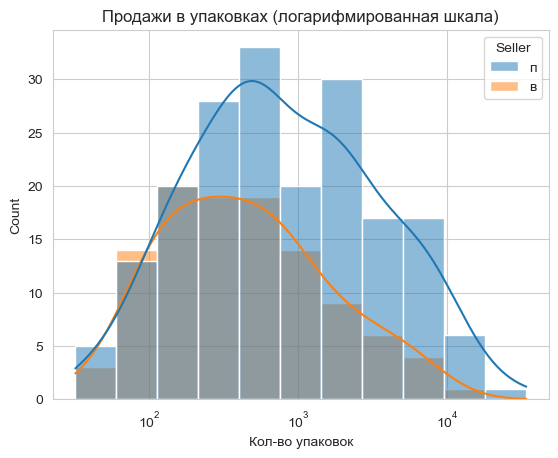

In [7]:
# диаграмма распределений нормализована, т.к. разные масштабы + есть небольшие выбросы
sns.histplot(data=df, x='Sales in packages', hue='Seller', kde=True, log_scale=True)
plt.title('Продажи в упаковках (логарифмированная шкала)')
plt.xlabel('Кол-во упаковок')
plt.show()

In [8]:
# однофакторный дисперсионный анализ
f_statistic, p_value_1 = sp.f_oneway(pyaterochka, vkus)
f_statistic, p_value_1

(8.795538838041123, 0.003264746145580327)

In [9]:
# t-тестирование
t_statistic_2, p_value_2 = sp.ttest_ind(pyaterochka, vkus)
t_statistic_2, p_value_2

(2.9657273708217207, 0.003264746145580329)

In [10]:
result2 = pd.DataFrame([[p_value_1, f_statistic], [p_value_2, t_statistic_2]], 
                        columns=['p-value', 'statistic'], index=['f-value', 'T-test'])
result2

,p-value,statistic
f-value,0.003265,8.795539
T-test,0.003265,2.965727


P-value в обоих случаях <0.05 => отвергаем нулевую гипотезу и принимаем альтернативную гипотезу, т.е. есть статистическая значимость в различии между средними распределений магазинов продаж в упаковках чая. Так как изначально на интерактивном дашборде это число было больше у Пятерочки => у этого магазина в действительности больше продаж в упаковках чая
